<a href="https://colab.research.google.com/github/Sangee-28/GuviTasks/blob/main/Logistic_Regression_Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# from collections import Counter
# import itertools
import seaborn as sns
import matplotlib.ticker as tick
import matplotlib.patches as patches
import matplotlib.pyplot as plt
% matplotlib inline

**Importing the dataset**

In [9]:
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Social_Network_Ads.csv']))

Saving Social_Network_Ads.csv to Social_Network_Ads (2).csv


In [43]:
df.head()
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [44]:
X = df.iloc[:,2:4]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=111) # split the data 
X_train

,Age,EstimatedSalary
353,37,57000
132,30,87000
114,42,80000
240,42,149000
384,57,33000
...,...,...
275,57,74000
86,24,55000
212,59,42000
364,42,104000


**Feature Scaling**

In [29]:
scaler = StandardScaler()
scaler.fit(X_train) # compute mu and sigma
X_train = scaler.transform(X_train)
# wrong - never call scaler fit on test again - scaler.fit(X_test)
X_test = scaler.transform(X_test)


array([[-0.05450976],
       [-0.72033366],
       [ 0.42107874],
       [ 0.42107874],
       [ 1.84784424],
       [-1.38615755],
       [-0.24474516],
       [-0.24474516],
       [-1.48127525],
       [ 2.13319734],
       [-0.43498056],
       [-0.24474516],
       [ 1.65760884],
       [ 0.32596104],
       [-0.14962746],
       [-1.76662835],
       [ 1.08690264],
       [-0.62521596],
       [ 1.37225574],
       [-1.29103986],
       [-1.19592216],
       [ 0.13572564],
       [ 0.99178494],
       [ 0.32596104],
       [-0.05450976],
       [-1.19592216],
       [ 0.13572564],
       [-0.14962746],
       [-1.67151065],
       [-0.05450976],
       [ 0.32596104],
       [-0.24474516],
       [ 0.70643184],
       [ 0.42107874],
       [-0.72033366],
       [-1.86174605],
       [-0.24474516],
       [ 1.37225574],
       [ 0.80154954],
       [ 0.61131414],
       [ 1.94296194],
       [-0.24474516],
       [ 0.89666724],
       [-1.86174605],
       [ 0.13572564],
       [ 0

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [45]:
log_reg = LogisticRegression() # initialise the model, ready to be used
log_reg.fit(X_train, y_train) #training of data happens  

LogisticRegression()

**Step 3 | Predection**

In [46]:
log_reg.predict_proba(X_test)
y_test_predictions = log_reg.predict(X_test)
y_test_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [47]:
cnf_matrix = confusion_matrix(y_test, log_reg.predict(X_test))
cnf_matrix


array([[86,  0],
       [54,  0]])

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, log_reg.predict(X_test)))


0.6142857142857143


In [49]:
from sklearn.metrics import precision_score
print("Precision: {0}".format(precision_score(y_test, log_reg.predict(X_test))))

Precision: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])

0.23858742463393628

**Visualization**

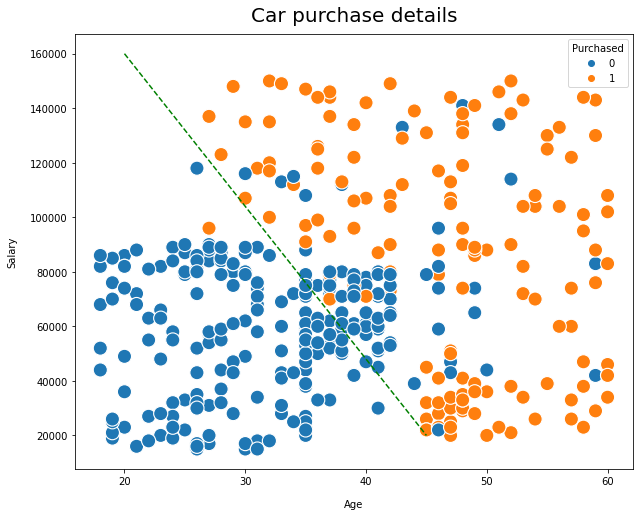

In [64]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, s=200)
plt.plot([20, 45], [160000, 20000], linestyle="--", color='green')
plt.title("Car purchase details", y=1.015, fontsize=20)

plt.xlabel("Age", labelpad=13)
plt.ylabel("Salary", labelpad=13)
ax = plt.gca()

